# <center> **How To Win Your Fantasy Football League** <center>

<center> By: David Lytikainen, Samar Seth, Keshav Sawhney

## <center> Intro <center>

Every Sunday in the United States, people sit down and watch football with their families and relax on their day off. However, for some Americans, their Sundays are spent stressing over the same football game. Why are these people stressing? These people play fantasy football. People of all ages, from pre-teens to senior adults, log on to the ESPN and NFL fantasy football apps and investigate their fantasy roster as if it is a real football roster. As they log on to these apps, they watch shows such as “NFL Fantasy Live” and “Fantasy Football Focus Show” to try and gain whatever advantage they can over their league opponents. The United States of America is infatuated with fantasy football, for good reason, and we will go in depth into the numbers behind fantasy football in order to help these fellow fantasy football participants win their fantasy leagues.

There are three different types of scoring options for fantasy football: PPR, half-PPR, and standard scoring system. PPR stands for “point per reception,” so in these leagues every reception a player makes counts for 1 point plus any additional yard they gain is 0.1 point. In half-PPR leagues every reception gives 0.5 points plus any additional yard they gain is 0.1 point and in the standard scoring system no points are awarded for receptions, only for receiving yards which are each 0.1 points. Points are also awarded for any rushing yards they gain which are also 0.1 points each. Every receiving or rushing touchdown a player scores gives 6 points, while any touchdown a player throws is worth 4 points. The most used fantasy football option is either half-PPR or PPR, however, we will mainly focus on PPR scoring.

Digressing from fantasy football for a second, one of the most important measures for every human being is efficiency. Everyone is always trying to improve their lives to be more efficient with their time, more efficient with their money, or even more efficient with their travel. Efficiency is defined as generating the most output with the input that you have. This translates directly to fantasy football. Every player wants to be as efficient with their “touches” as possible. To simplify this, we will be defining our input or “touches” as any receptions or rushing attempts a player makes. Since we are combining the rushing and receiving attempts into one stat, this will make it harder to compare between different positions. This happens because, for the most part, running backs gather more rushing attempts throughout the game, while receivers gather more receptions throughout the game. This tutorial will go deeper into the numbers behind how efficient each position really is with the touches that they get.

## <center> Data Scraping <center>

To get our data, first we found a website that gives the PPR scoring statistics that we are looking for. We found the website below called “The Football Database,” which gives the rushing, receiving, and even the passing statistics for the 2021-2022 NFL season along with the PPR fantasy points each player scored. To be able to use this data in our tutorial, we will use requests to import the data, pandas to read and format the data, numpy to interpret the data, and matplotlib to display our results.

In [7]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import re

In [11]:
wrURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=WR&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'
rbURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=RB&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'
teURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=TE&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'
flexURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=flex&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'

session = requests.Session()
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36'}

def getTable(url):
    page = session.get(url, headers=headers)
    
    return pd.read_html(page.content.decode())

wr = getTable(wrURL)[0]
rb = getTable(rbURL)[0]
te = getTable(teURL)[0]
flex = getTable(flexURL)[0]

In this section, we are renaming our column names, as the data that we scraped did not have column names for each player, their bye week, and how many points they scored in fantasy in 2021-2022.

In [12]:
wr.rename(columns={"Unnamed: 0_level_0":"Player"}, inplace=True)
wr.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True, level=0)
wr.rename(columns={"Unnamed: 2_level_0":"Pts"}, inplace=True)
wr["Player Name"] = list(map(lambda x: re.sub("\..+", '', x)[:-1], wr["Player"]["Player"]))
wr.drop("Player", axis=1, inplace=True, level=0)

rb.rename(columns={"Unnamed: 0_level_0":"Player"}, inplace=True)
rb.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True, level=0)
rb.rename(columns={"Unnamed: 2_level_0":"Pts"}, inplace=True)

te.rename(columns={"Unnamed: 0_level_0":"Player"}, inplace=True)
te.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True, level=0)
te.rename(columns={"Unnamed: 2_level_0":"Pts"}, inplace=True)

flex.rename(columns={"Unnamed: 0_level_0":"Player"}, inplace=True)
flex.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True, level=0)
flex.rename(columns={"Unnamed: 2_level_0":"Pts"}, inplace=True)

wr.head()

Pts Passing                    Rushing             Receiving            \
    Pts*     Att Cmp Yds TD Int 2Pt     Att  Yds TD 2Pt       Rec   Yds  TD   
0  430.0       1   0   0  0   0   0       4   18  0   0       145  1947  16   
1  337.0       0   0   0  0   0   0       0    0  0   0       123  1553  11   
2  329.0       2   1  24  1   0   0      59  365  8   0        77  1405   6   
3  321.0       4   2  35  0   0   0       6   14  0   0       108  1616  10   
4  295.0       0   0   0  0   0   0       7   21  0   0        81  1455  13   

      Fumbles          Player Name  
  2Pt      FL TD                    
0   1       0  0       Cooper Kupp  
1   0       0  0     Davante Adams  
2   0       2  0      Deebo Samuel  
3   0       1  0  Justin Jefferson  
4   0       1  0     Ja'Marr Chase

## <center> Data Analysis <center>

We will start our analysis by looking at the efficiency of all players throughout the whole season, even if they only “touched” the ball one time. Again, we will use “points per touch” as our efficiency method, as every fantasy football manager would love to see their player score as many points as possible every time they touch the ball. To incorporate skill positions players (running backs, wide receivers, and tight ends) who threw the ball into this analysis, we included passing completions as a touch. By doing this, our plot will show how the whole offense in the NFL in the 2021-2022 season fared in terms of points scored per touch.

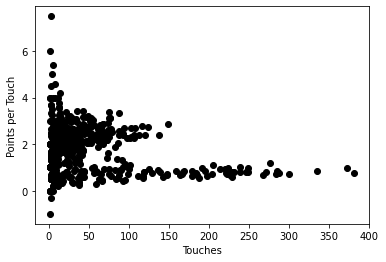

In [4]:
def ppt(df):
    df["Touches"] = df["Passing"]["Cmp"] + df["Rushing"]["Att"] + df["Receiving"]["Rec"]
    df["Points per Touch"] = df["Pts"]["Pts*"]/df["Touches"]

ppt(wr)
ppt(rb)
ppt(te)
ppt(flex)

plt.scatter(flex["Touches"], flex["Points per Touch"], c="black")
plt.xlabel("Touches")
plt.ylabel("Points per Touch")
plt.show()

As you can see in the graph above, there is a large amount of volatility in the points per touch for players with low touches (less than 25 touches). In this range, players points per touch ranged anywhere from above 6 points per touch to less than 0 points per touch. In fantasy football, the most points per touch that you can possibly get is 16.9 points on a 99 yard touchdown reception (6 points for a touchdown, 9.9 points for 99 receiving yards, 1 point for a reception). In real football terms this is near impossible to sustain for every touch and we see this here as the highest points per touch is 10 points less than the maximum. 
We looked back at our original dataset from “The Football Database” in order to find who the most efficient player was. This player is Ito Smith, who had one rushing attempt for 4 yards and a touchdown. For the 2021-2022 NFL season, Ito Smith was the golden standard for fantasy football in terms of points per touch.

As the amount of touches increases, the volatility in points per touch decreases significantly. In the range from 175 touches to 400 touches, all players stayed in the range of 0.5 to 1.5 touches. However, in the range of 25 to 175 touches there was still much volatility with more clumping of data which is likely due to different positions being compared at the same time. 

To enhance our analysis, we will now move on to analyzing each position one by one. In this section, we will analyze wide receivers first, then running backs, then tight ends. The reason why we are analyzing wide receivers first is because they are more important on a points per touch basis in a PPR league compared to a standard or half-PPR league, due to wide receivers catching the ball much more than running backs. In order to ignore any outliers, we will be looking at wide receivers with more than 50 touches, running backs with more than 100 touches, and tight ends with more than 15 touches. We will also look at the top 50 wide receivers, the top 50 running backs, and the top 15 tight ends in the league in terms of points scored.

In [5]:
wr50touches = wr[wr['Touches'] > 50]
top50wr = wr[:50]

rb100touches = rb[rb['Touches'] > 100]
top50rb = rb[:50]

te20touches = te[te['Touches'] > 20]
top15te = te[:15]

wr50touches.reset_index()
rb100touches.reset_index()
te20touches.reset_index()

def touches_vs_ppt(df, axis):
    axis.scatter(df["Touches"], df["Points per Touch"], c="black")
    
    minTouches = np.min(df["Touches"])
    maxTouches = np.max(df["Touches"])
    meanTouches = np.mean(df["Touches"])
    
    minPPT = np.min(df["Points per Touch"])
    maxPPT = np.max(df["Points per Touch"])
    meanPPT = np.mean(df["Points per Touch"])
    
    axis.plot([meanTouches, meanTouches], [minPPT, maxPPT], c="blue")
    axis.plot([minTouches, maxTouches], [meanPPT, meanPPT], c="blue")
    axis.set(xlabel = "Touches", ylabel = "Points per Touch")

def touches_vs_pts(df, axis):
    axis.scatter(df["Touches"], df["Pts"]["Pts*"], c="black")
    axis.set(xlabel = "Touches", ylabel = "Points")
    
def ppt_vs_pts(df, axis):
    axis.scatter(df["Points per Touch"], df["Pts"]["Pts*"], c="black")
    axis.set(xlabel = "Points per Touch", ylabel = "Points")
    
def make_plts(df1, df2, axs):
    touches_vs_pts(df1, axs[1, 0])
    touches_vs_pts(df2, axs[1,  1])
    ppt_vs_pts(df1, axs[2, 0])
    ppt_vs_pts(df2, axs[2, 1])
    touches_vs_ppt(df1, axs[0, 0])
    touches_vs_ppt(df2, axs[0, 1])

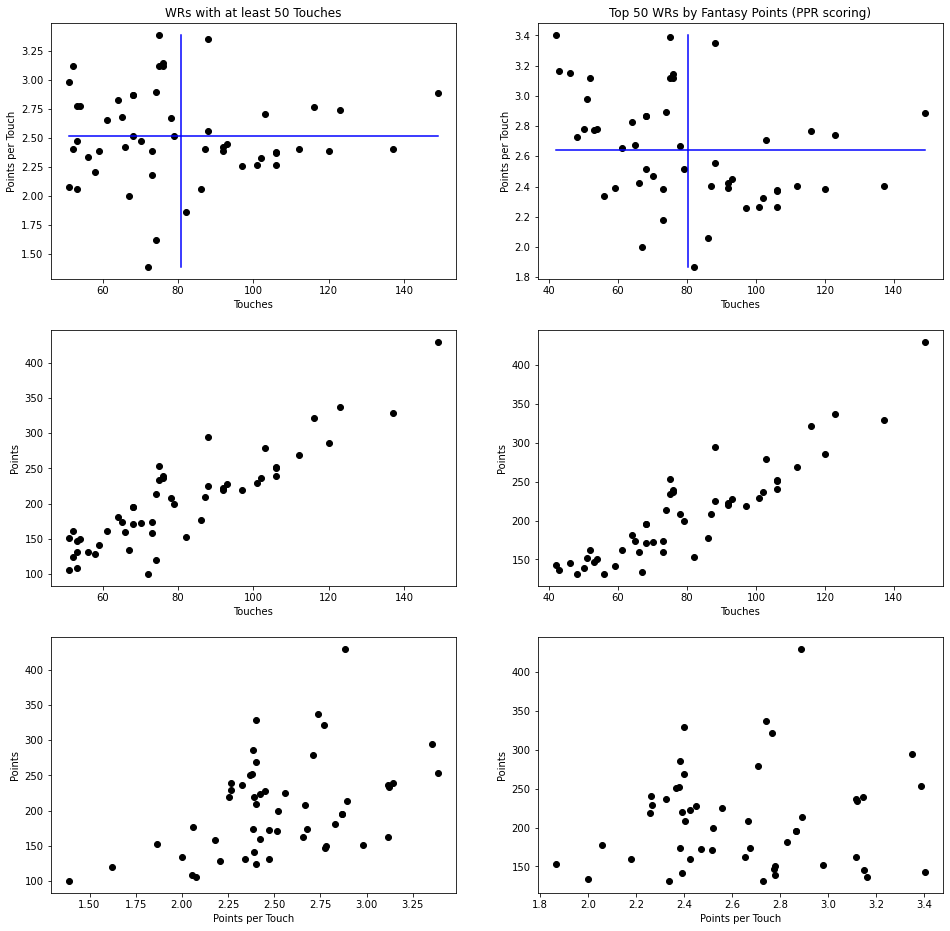

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(16,16))

make_plts(wr50touches, top50wr, axs)

axs[0,0].set_title("WRs with at least 50 Touches")
axs[0,1].set_title("Top 50 WRs by Fantasy Points (PPR scoring)")
plt.show()

In the above middle two plots, we can see that as touches increase so do points. Naturally, the first thought that comes to mind is that the players with the most touches must be very efficient with their touches. However, the bottom two plots show that this may not always be the case. There are several data points with high points per touch and low points scored. This may be due to underutilized players in systems that they do not fit in. One example of this is Odell Beckham Jr who escaped the terrible Cleveland Browns organization and won a super bowl with the Los Angeles Rams.

Another thing we noticed from the first two plots is that high touches does not always equal high points per touch, as feeding one player the ball too much may hinder their ability to gather fantasy points efficiently. For wide receivers with at least 50 touches, the mean points per touch was about 2.5, while for the top 50 wide receivers in terms of points scored, the mean points per touch was about 2.6. From this information, we can see that the fringe top 50 wide receivers that did not get as many touches as some other players had to be very efficient in order to help their team, and they were successful in doing this.


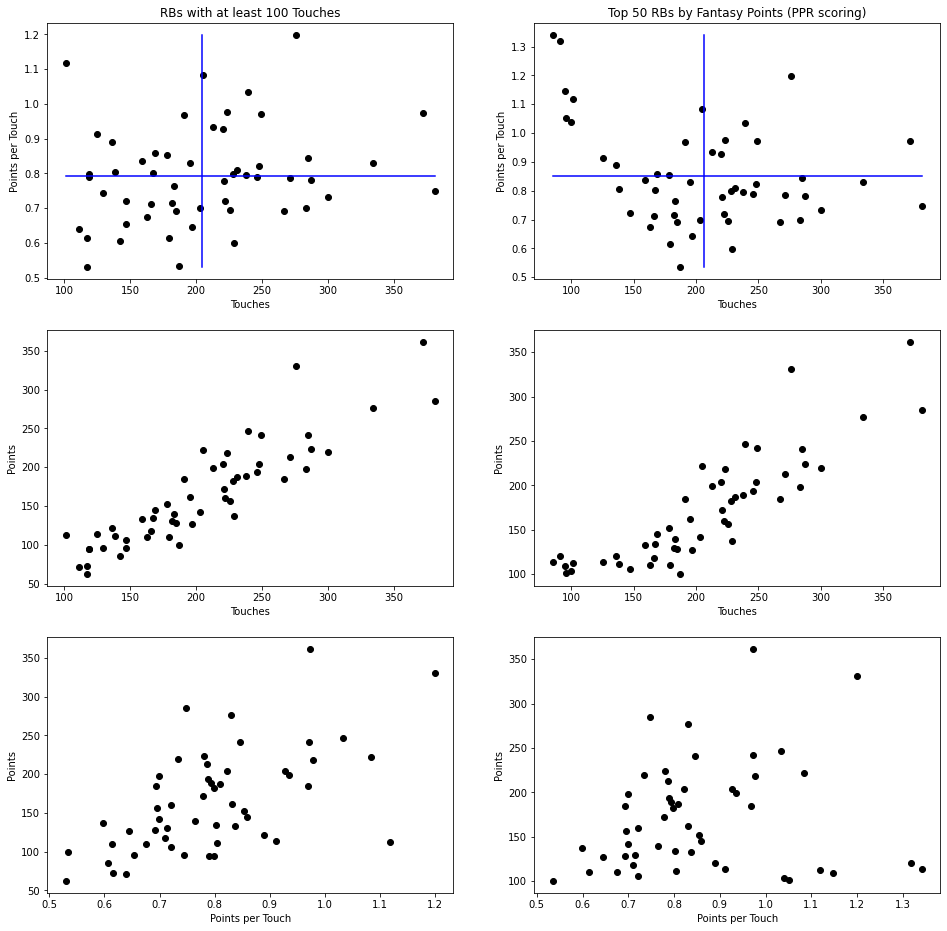

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(16,16))

make_plts(rb100touches, top50rb, axs)

axs[0,0].set_title("RBs with at least 100 Touches")
axs[0,1].set_title("Top 50 RBs by Fantasy Points (PPR scoring)")
plt.show()

We will now look at running backs. We expect the points per touch for running backs to be much lower than wide receivers, due to running backs not getting a point for every rushing attempt. In the middle two plots, we saw the same trend as the wide receivers, meaning that as touches increase, so do points. We also see the same trend in the first two plots. For running backs with at least 100 touches, the mean points per touch was about 0.8, while for the top 50 running backs in terms of points scored, the mean points per touch was about 0.85. The context behind this is likely due to “third down running backs” who only come into the game when the team is in an obvious passing situation. Many of these running backs are perfect for fantasy football as they rack up yards while also racking up receptions, making them much more valuable.

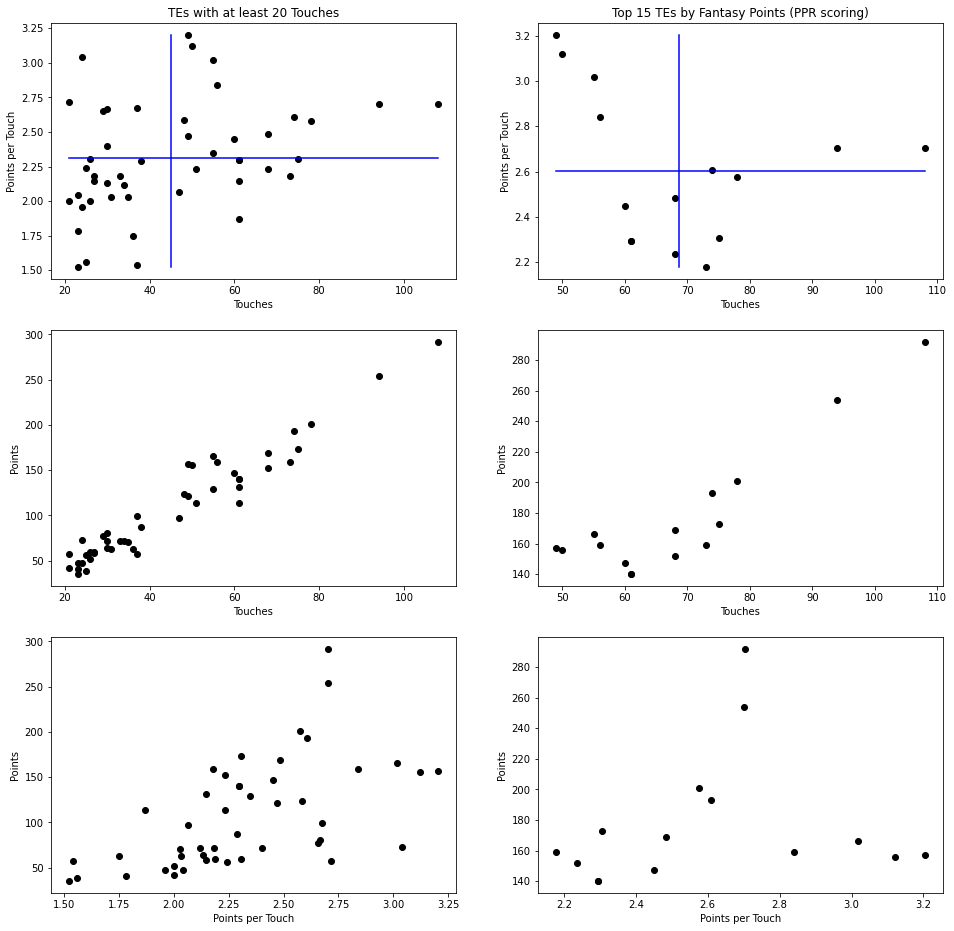

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(16,16))

make_plts(te20touches, top15te, axs)

axs[0,0].set_title("TEs with at least 20 Touches")
axs[0,1].set_title("Top 15 TEs by Fantasy Points (PPR scoring)")
plt.show()

The tight end position showed the most volatility of each position, for good reason. Most tight ends are only on the field to block, and end up receiving the ball only because the defense forgot about them. There are not many tight ends that are on the field to receive the football. Due to this, we see the trend of the first two plots continuing. For tight ends with at least 20 touches, the mean points per touch was about 2.3, while for the top 15 tight ends in terms of points scored, the mean points per touch was about 2.6. Also, for the top 15 tight ends in the league there was a lot of variation in terms of points per touch. This can be seen in the bottom right graph, as this is likely due to different players in different schemes, such as players like George Kittle being a vertical threat, while players like Kyle Pitts are more of a short to mid yardage receiver.

## <center> Conclusion <center>

When drafting for fantasy football, there are many factors to take into consideration. This includes things such as a player's injury history, a player changing teams, or even personal bias towards a player. This tutorial showed that the most important factor in choosing a player is the amount of "points per touch" that player scores. Using this statistic as a measuring tool for each position, the running back position may be somewhat overrated in terms of PPR leagues. The top 50 running backs only had a point per touch of around 0.85 compared to the 2.6 points per touch for the top 50 wide receivers and top 15 tight ends. When drafting in fantasy football, a lot of emphasis is put on getting good running backs to solidify your team. While this approach is solid, it can be improved by trying to find wide receivers with high points per touch that are not drafted very high. It would also help to find tight ends that are efficient with their touches that are sleepers in your fantasy leagues.